# Credit Card Customers Mini-Project

### Download dataset from Kaggle

In [1]:
!kaggle datasets download sakshigoyal7/credit-card-customers
!unzip credit-card-customers.zip -d /content/credit-card-customers

Dataset URL: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers
License(s): CC0-1.0
  0% 0.00/379k [00:00<?, ?B/s]
100% 379k/379k [00:00<00:00, 34.2MB/s]
Archive:  credit-card-customers.zip
  inflating: /content/credit-card-customers/BankChurners.csv  


### Import necessary libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

### Load the dataset

In [3]:
data = pd.read_csv('/content/credit-card-customers/BankChurners.csv')

## 1.1 Dataset Summary

### Remove unnecessary columns

In [4]:
data = data.drop(columns=[
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
])

### Print features and number of samples

In [5]:
print("Features in the dataset:", data.columns.tolist())
print("Total number of features:", len(data.columns))
print("Number of samples:", data.shape[0])

Features in the dataset: ['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
Total number of features: 21
Number of samples: 10127


## 1.2 Data Visualization (Pairplot)

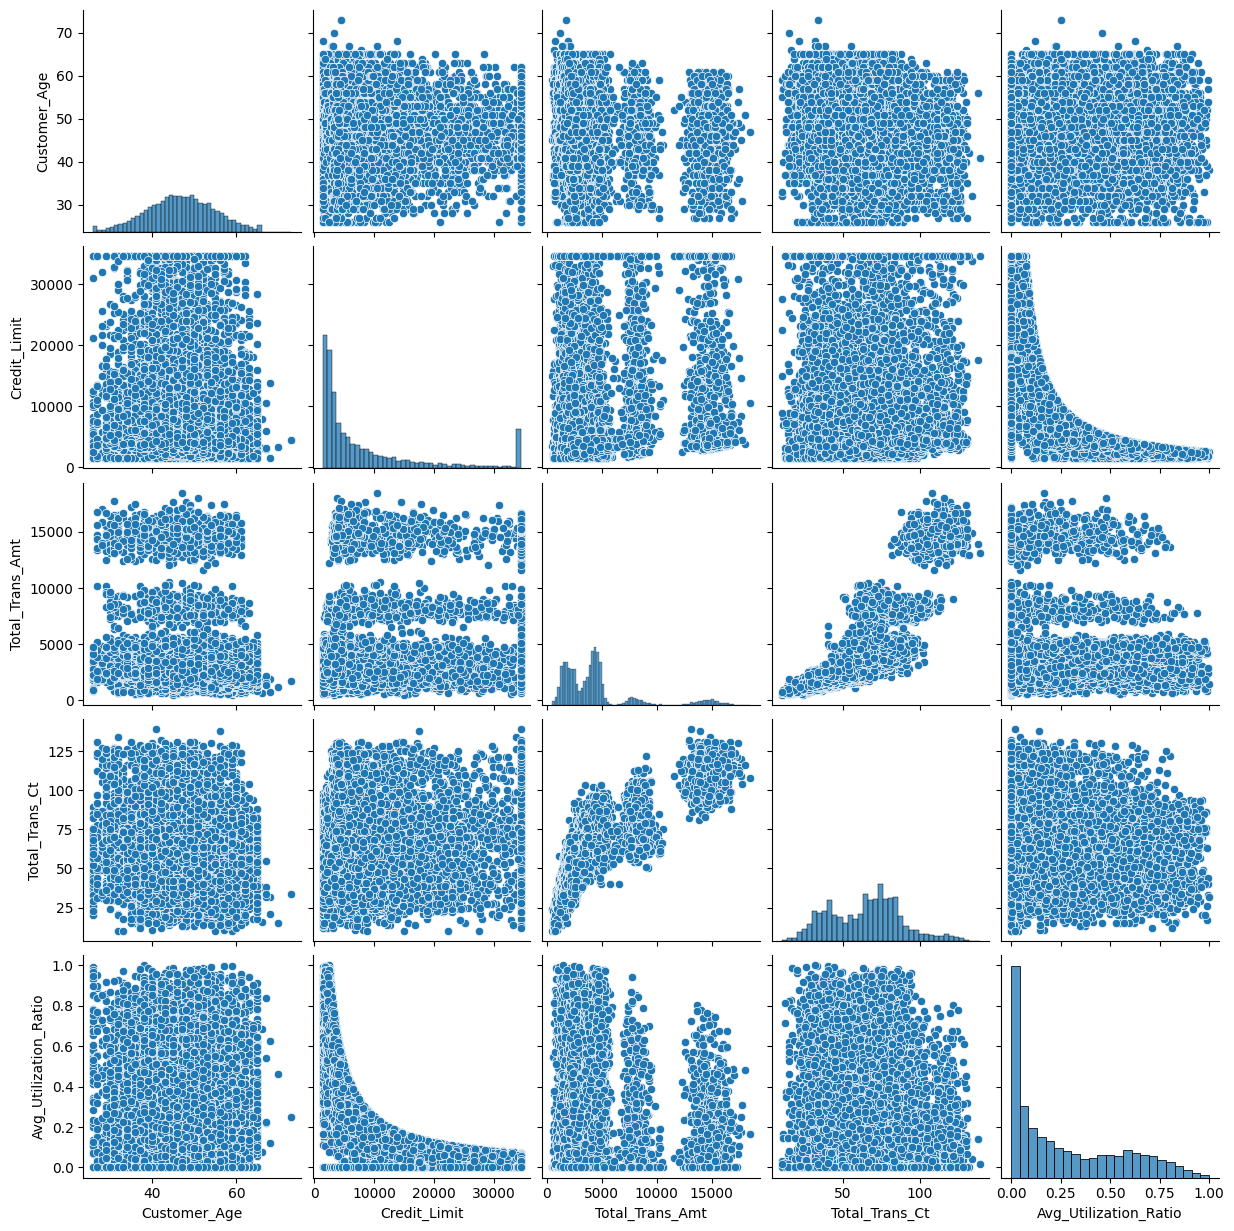

In [6]:
selected_features = ['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio']
sns.pairplot(data[selected_features])
plt.show()

## 1.3 Correlation Heatmap

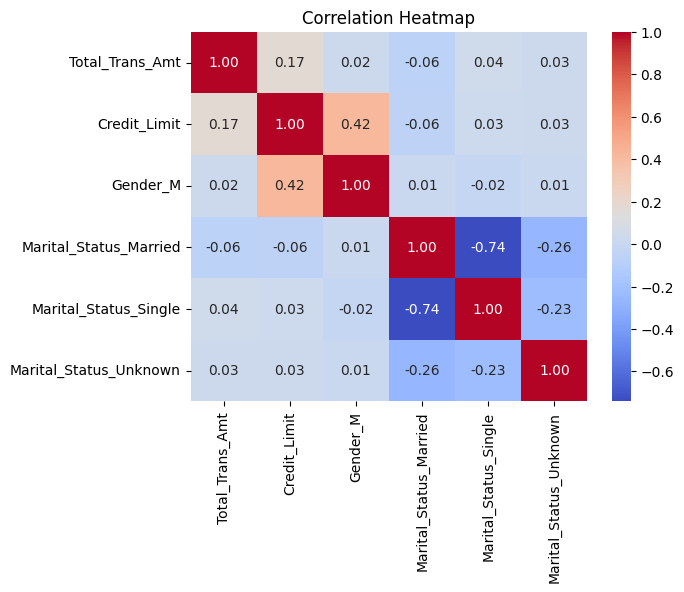

In [7]:
selected_corr_features = ['Gender', 'Marital_Status', 'Total_Trans_Amt', 'Credit_Limit']
data_encoded = pd.get_dummies(data[selected_corr_features], drop_first=True)
correlation_matrix = data_encoded.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

## 1.4 Handle Missing Values

In [8]:
data.replace('Unknown', pd.NA, inplace=True)
nan_data = data.isna().sum()
print("Missing values per column:\n", nan_data)

Missing values per column:
 CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64


### Drop rows with missing values

In [9]:
data = data.dropna()
print("Shape after dropping NaN values:", data.shape)

Shape after dropping NaN values: (7081, 21)


## 1.5 Class Imbalance Analysis

### Check Attrition Flag classes and their distribution

In [10]:
attrition_counts = data['Attrition_Flag'].value_counts()
print("Class distribution in 'Attrition_Flag':\n", attrition_counts)

Class distribution in 'Attrition_Flag':
 Attrition_Flag
Existing Customer    5968
Attrited Customer    1113
Name: count, dtype: int64


### Plot pie chart for class distribution

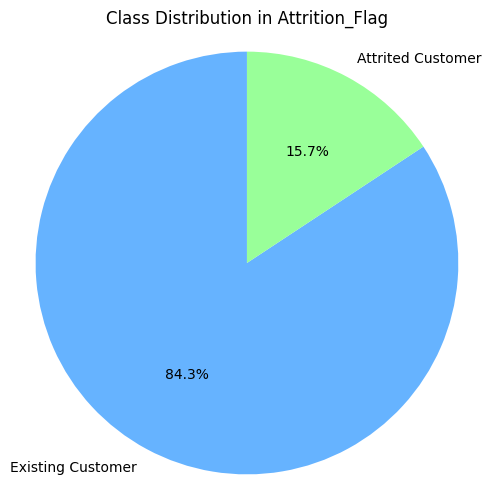

In [11]:
plt.figure(figsize=(6, 6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Class Distribution in Attrition_Flag')
plt.axis('equal')
plt.show()

## 1.6 Model Training and Evaluation

### Encode categorical variables

In [12]:
categorical_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

### Define features (X) and target (y)

In [13]:
X = data.drop(columns=['Attrition_Flag', 'CLIENTNUM'])
y = data['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

### Split data into training, validation, and test sets

In [14]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=73)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=73)

### Train a Random Forest model (Unbalanced)

In [15]:
model = RandomForestClassifier(random_state=73)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=73)

### Evaluate the model on train, validation, and test sets

In [16]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

print("Unbalanced Model - Training Report:")
print(classification_report(y_train, y_train_pred))
print("Unbalanced Model - Validation Report:")
print(classification_report(y_val, y_val_pred))
print("Unbalanced Model - Test Report:")
print(classification_report(y_test, y_test_pred))

Unbalanced Model - Training Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4186
           1       1.00      1.00      1.00       770

    accuracy                           1.00      4956
   macro avg       1.00      1.00      1.00      4956
weighted avg       1.00      1.00      1.00      4956

Unbalanced Model - Validation Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       882
           1       0.95      0.77      0.85       180

    accuracy                           0.95      1062
   macro avg       0.95      0.88      0.91      1062
weighted avg       0.95      0.95      0.95      1062

Unbalanced Model - Test Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       900
           1       0.94      0.80      0.86       163

    accuracy                           0.96      1063
   macro avg       0.9

### Confusion matrix (Test set)

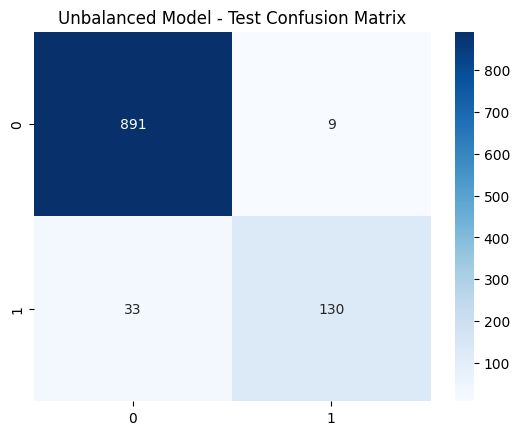

In [17]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Unbalanced Model - Test Confusion Matrix")
plt.show()

### Balance the data using SMOTE

In [18]:
smote = SMOTE(random_state=73)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

### Train the Random Forest model (Balanced)

In [19]:
model_balanced = RandomForestClassifier(random_state=73)
model_balanced.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=73)

### Evaluate the balanced model

In [20]:
y_train_balanced_pred = model_balanced.predict(X_train_balanced)
y_val_balanced_pred = model_balanced.predict(X_val)
y_test_balanced_pred = model_balanced.predict(X_test)

print("Balanced Model - Training Report:")
print(classification_report(y_train_balanced, y_train_balanced_pred))
print("Balanced Model - Validation Report:")
print(classification_report(y_val, y_val_balanced_pred))
print("Balanced Model - Test Report:")
print(classification_report(y_test, y_test_balanced_pred))

Balanced Model - Training Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4186
           1       1.00      1.00      1.00      4186

    accuracy                           1.00      8372
   macro avg       1.00      1.00      1.00      8372
weighted avg       1.00      1.00      1.00      8372

Balanced Model - Validation Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       882
           1       0.87      0.87      0.87       180

    accuracy                           0.96      1062
   macro avg       0.92      0.92      0.92      1062
weighted avg       0.96      0.96      0.96      1062

Balanced Model - Test Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       900
           1       0.87      0.86      0.86       163

    accuracy                           0.96      1063
   macro avg       0.92     

### Confusion matrix (Test set)

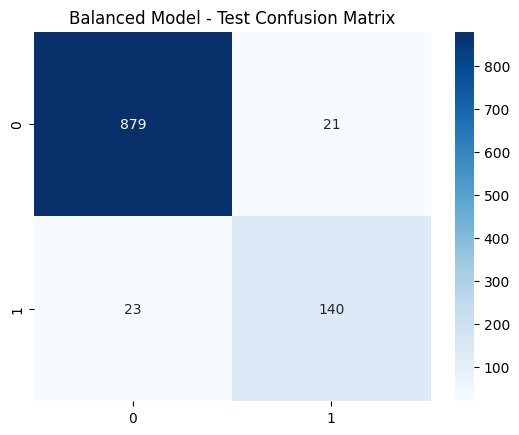

In [21]:
sns.heatmap(confusion_matrix(y_test, y_test_balanced_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Balanced Model - Test Confusion Matrix")
plt.show()

## Bonus: Visualizing Pairplot for Selected Features Grouped by Flag Attrition

### Select features for the pairplot

In [22]:
selected_features = ['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio']

### Add Flag Attrition to the selected features for class-based visualization

In [23]:
pairplot_features = selected_features + ['Attrition_Flag']

### Generate pairplot with hue set to Attrition Flag for class-based visualization

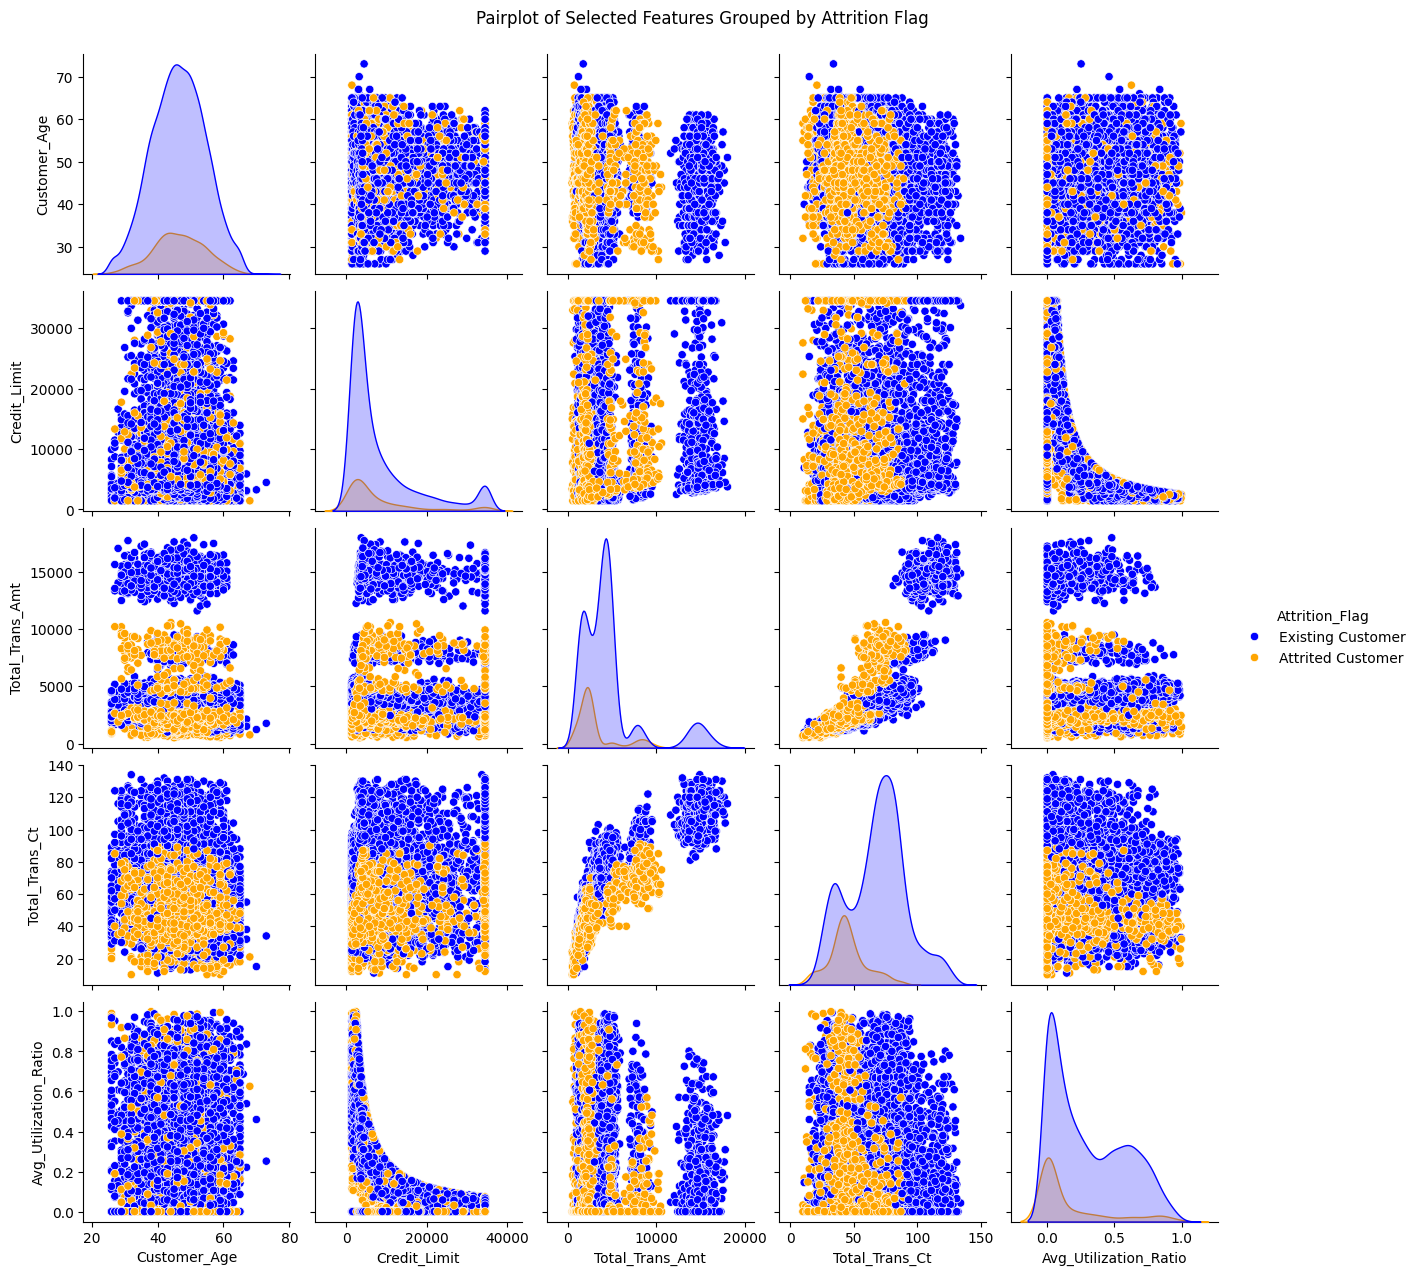

In [24]:
sns.pairplot(data[pairplot_features], hue='Attrition_Flag', palette={'Existing Customer': 'blue', 'Attrited Customer': 'orange'})

plt.suptitle("Pairplot of Selected Features Grouped by Attrition Flag", y=1.02)
plt.show()